In [1]:
# declare a list tasks whose products you want to use as inputs
upstream = None

In [2]:
# Parameters
product = {"data": "/Users/lukastang/Documents/GitHub/Model_Interpretability/output/0_source_data/Processed_Obesity_Dataset.csv", "mappings": "/Users/lukastang/Documents/GitHub/Model_Interpretability/output/0_source_data/Obesity_Dataset_Mappings.csv", "nb": "/Users/lukastang/Documents/GitHub/Model_Interpretability/output/0_source_data/0_source_data.ipynb", "on_finish": "/Users/lukastang/Documents/GitHub/Model_Interpretability/0_source_data_test.py"}


## Obesity Dataset Import and analysis

This notebook performs an analysis on the Obesity Dataset. The dataset contains various features related to obesity and lifestyle habits.

### Steps:
1. Load the dataset from an Excel file.
2. Map categorical variables to more readable labels.
3. Some first visualizations
4. Save the processed dataset to a CSV file for further use in later scripts

### Dataset Information:
- **Sex**: Gender of the individual.
- **Overweight_Obese_Family**: Family history of being overweight or obese.
- **Consumption_of_Fast_Food**: Frequency of fast food consumption.
- **Frequency_of_Consuming_Vegetables**: Frequency of vegetable consumption.
- **Number_of_Main_Meals_Daily**: Number of main meals consumed daily.
- **Food_Intake_Between_Meals**: Frequency of food intake between meals.
- **Smoking**: Smoking habits.
- **Liquid_Intake_Daily**: Daily liquid intake.
- **Calculation_of_Calorie_Intake**: Whether the individual calculates their calorie intake.
- **Physical_Excercise**: Physical exercise habits.
- **Schedule_Dedicated_to_Technology**: Time dedicated to technology use.
- **Type_of_Transportation_Used**: Type of transportation used.
- **Class**: Obesity class of the individual.

The following sections will provide detailed insights and visualizations based on the dataset.

   Sex  Age  Height  Overweight_Obese_Family  Consumption_of_Fast_Food  \
0    2   18     155                        2                         2   
1    2   18     158                        2                         2   
2    2   18     159                        2                         2   
3    2   18     162                        2                         2   
4    2   18     165                        2                         1   

   Frequency_of_Consuming_Vegetables  Number_of_Main_Meals_Daily  \
0                                  3                           1   
1                                  3                           1   
2                                  2                           1   
3                                  2                           2   
4                                  2                           1   

   Food_Intake_Between_Meals  Smoking  Liquid_Intake_Daily  \
0                          3        2                    1   
1                     

/var/folders/r7/71vqyh_566sb4rd655_gw2300000gn/T/ipykernel_7871/1977669776.py:114: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


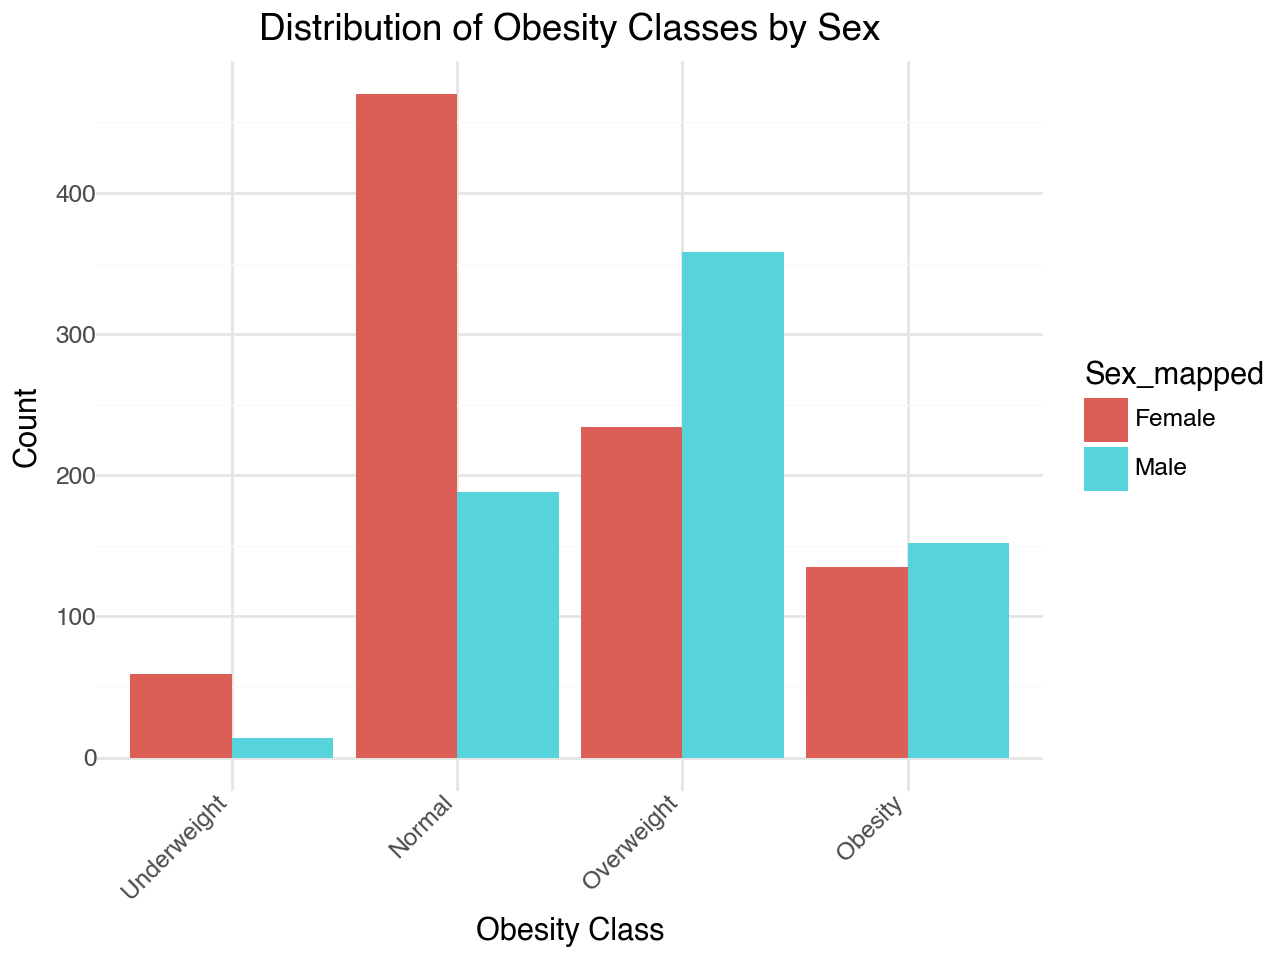

In [3]:


# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs, theme, element_text
import IPython
import json

# file path to data
filename = "/Users/lukastang/Documents/GitHub/Model_Interpretability/data/Obesity_Dataset.xlsx"

# Read the Excel file
# Define the relative path to the folder and the Excel file
obesity_dataset = pd.read_excel(filename , sheet_name="obesity_dataset")
obesity_dataset_mappings = pd.read_excel(filename, sheet_name="mappings")

# Print the head of the dataset
print(obesity_dataset.head())

def map_variable(df, mappings, variable):
    """
    Maps the values of a specified variable in a DataFrame to new values based on a provided mapping DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the variable to be mapped.
        mappings (pandas.DataFrame): A DataFrame containing the mapping information. 
                                     It should have columns 'Variable', 'Value', and 'Mapping'.
        variable (str): The name of the variable in `df` to be mapped.

    Returns:
        None: The function modifies the input DataFrame `df` in place, adding a new column 
              with the mapped values. The new column is named as the original variable 
              with '_mapped' appended to it.
    """
    mapping_dict = mappings[mappings['Variable'] == variable].set_index('Value')['Mapping'].to_dict()
    df[variable + '_mapped'] = df[variable].map(mapping_dict)

# List of variables to map
variables_to_map = [
    'Sex', 'Overweight_Obese_Family', 'Consumption_of_Fast_Food', 
    'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily', 
    'Food_Intake_Between_Meals', 'Smoking', 'Liquid_Intake_Daily', 
    'Calculation_of_Calorie_Intake', 'Physical_Excercise', 
    'Schedule_Dedicated_to_Technology', 'Type_of_Transportation_Used', 'Class'
]

# Looping through the variables and mapping
for variable in variables_to_map:
    map_variable(obesity_dataset, obesity_dataset_mappings, variable)

# Removing non-mapped variables
obesity_dataset.drop(columns=variables_to_map, inplace=True)

# Print the head of the dataset with mapped variables
print(obesity_dataset.head())

# Extract the order of categories from the mappings DataFrame
def extract_order(mappings, variable):
    """
    Extracts the order of categories for a specified variable from the mappings DataFrame.

    Args:
        mappings (pandas.DataFrame): A DataFrame containing the mapping information.
                                     It should have columns 'Variable', 'Value', 'Mapping', and 'Order'.
        variable (str): The name of the variable to extract the order for.

    Returns:
        list: A list of categories in the specified order.
    """
    return mappings[mappings['Variable'] == variable].sort_values(by='Value')['Mapping'].tolist()

def set_categorical_order(df, mappings, variables=[
    'Class', 'Frequency_of_Consuming_Vegetables', 'Number_of_Main_Meals_Daily',
    'Food_Intake_Between_Meals', 'Liquid_Intake_Daily', 
    'Schedule_Dedicated_to_Technology'
]):
    """
    Sets the categorical order for specified variables in a DataFrame based on a provided mapping DataFrame.

    Args:
        df (pandas.DataFrame): The DataFrame containing the variables to be ordered.
        mappings (pandas.DataFrame): A DataFrame containing the mapping information.
                                     It should have columns 'Variable', 'Value', 'Mapping', and 'Order'.
        variables (list): A list of variable names to set the categorical order for.

    Returns:
        None: The function modifies the input DataFrame `df` in place, setting the categorical order for specified variables.
    """
    for variable in variables:
        ordered_categories = extract_order(mappings, variable)
        df[variable + '_mapped'] = pd.Categorical(
            df[variable + '_mapped'], 
            categories=ordered_categories, 
            ordered=True
        )

# Set the categorical order for the specified variables
set_categorical_order(obesity_dataset, obesity_dataset_mappings)

# Some Visualizations

# Plot distribution of the mapped 'Class' variable using plotnine
# Ensure the correct order of the 'Class_mapped' variable

plot = (
    ggplot(obesity_dataset, aes(x='Class_mapped', fill='Sex_mapped')) +
    geom_bar(position='dodge') +
    theme_minimal() +
    labs(title='Distribution of Obesity Classes by Sex', x='Obesity Class', y='Count') +
    theme(axis_text_x=element_text(rotation=45, hjust=1))
)

print(plot)

# Save the processed dataset to a CSV file
processed_dataset_filename = "output/0_source_data/Processed_Obesity_Dataset.csv"
obesity_dataset.to_csv(processed_dataset_filename, index=False)

# Save the mappings to a CSV file
mappings_filename = "output/0_source_data/Obesity_Dataset_Mappings.csv"
obesity_dataset_mappings.to_csv(mappings_filename, index=False)